In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os
from   scipy import stats
import statsmodels.api as sm

In [ ]:
df_Churn_Modelling_archivo = pd.read_csv('Churn_Modelling.csv')

In [ ]:
# Leer el archivo CSV
df_Churn_Modelling_archivo = pd.read_csv('Churn_Modelling.csv')

# Verificar si hay duplicados en todo el DataFrame
sin_duplicados = df_Churn_Modelling_archivo.drop_duplicates()

# Imprimir los resultados
print(sin_duplicados)

In [ ]:
df_Churn_Modelling_archivo.head()

In [ ]:
df_Churn_Modelling_archivo.describe

In [ ]:
df_Churn_Modelling_archivo.shape

In [ ]:
#Algunas algunas estadísticas descriptivas sobre el DataFrame para facilitar la lectura de los datos
df_Churn_Modelling_archivo.describe()

In [ ]:
# Se crea un diccionario de mapeo para la transformación de  Gender string en números 0- 1
gender_mapping = {'Male': 1, 'Female': 0}

# Se aplica la transformación a la columna 'Gender' y se crea una nueva columna 'Gender_modificado'
df_Churn_Modelling_archivo['Gender_modificado'] = df_Churn_Modelling_archivo['Gender'].map(gender_mapping)

# Imprimir el data frame
print(df_Churn_Modelling_archivo.head())


In [9]:
df_Churn_Modelling_archivo.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [10]:
df_Churn_Modelling_archivo.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1


In [11]:
# Se crea un diccionario de mapeo para la transformación de  Geography string en números 1 = Spain , 2= France  y 3= Germany
geography_mapping = {'France': 2, 'Spain': 1, 'Germany': 3}

# Se aplica la transformación a la columna 'Geography' y se crea una nueva columna 'Geography_modificado'
df_Churn_Modelling_archivo['Geography_modificado'] = df_Churn_Modelling_archivo['Geography'].map(geography_mapping)

# Se Imprime el data frame
print(df_Churn_Modelling_archivo.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Gender_modificado  Geography_modificado  
0        101348.88       1                  0                     2  
1        112542.58

In [12]:
df_Churn_Modelling_archivo.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado,Geography_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1,2
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,3
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1,2
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1,2


In [ ]:
# Transformar la columna 'EstimatedSalary' a número y sin decimales
df_Churn_Modelling_archivo['EstimatedSalary'] = df_Churn_Modelling_archivo['EstimatedSalary'].apply(lambda x: f"{int(round(float(str(x).replace('$', '').replace(',', '')))):,}")

# Imprimir las primeras 5 filas del DataFrame
print(df_Churn_Modelling_archivo.head())




In [ ]:
# Transformar la columna 'EstimatedSalary' a moneda y sin decimales
df_Churn_Modelling_archivo['Balance'] = df_Churn_Modelling_archivo['Balance'].apply(lambda x: f"{int(round(float(str(x).replace('$', '').replace(',', '')))):,}")

# Imprimir las primeras 5 filas del DataFrame
print(df_Churn_Modelling_archivo.head())


In [15]:
df_Churn_Modelling_archivo.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado,Geography_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,"101,349",1,0,2
1,2,15647311,Hill,608,Spain,Female,41,1,"83,808",1,0,1,"112,543",0,0,1
2,3,15619304,Onio,502,France,Female,42,8,"159,661",3,1,0,"113,932",1,0,2
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,"93,827",0,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,511",1,1,1,"79,084",0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,"113,756",2,1,0,"149,757",1,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,"10,063",0,1,2
7,8,15656148,Obinna,376,Germany,Female,29,4,"115,047",4,1,0,"119,347",1,0,3
8,9,15792365,He,501,France,Male,44,4,"142,051",2,0,1,"74,940",0,1,2
9,10,15592389,H?,684,France,Male,27,2,"134,604",1,1,1,"71,726",0,1,2


In [ ]:
#DESAFIO 


#1 -Transformé Gender que era string en números y agregué la columna Gender_modificado -->antes asignando 2 a Female y 1 a Male
#2 -Verificar si hay duplicados en todo el DataFrame
#3 -Transformé Geography que era string en números y agregué la columna Geography_modificado
#4- Transformé la columna 'EstimatedSalary' a moneda y sin decimales
#5- Transformé la columna 'Balance' a moneda y sin decimales


In [ ]:
#Esto me sirve para tener presente los nombres de las colummnas para continuar con el análisis
df_Churn_Modelling_archivo.columns

Text(0, 0.5, 'EstimatedSalary')

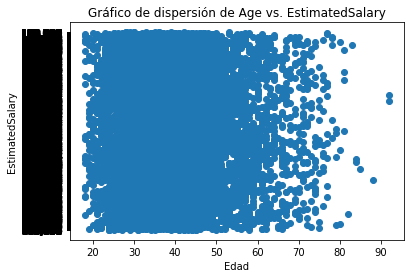

In [17]:
plt.scatter(df_Churn_Modelling_archivo['Age'], df_Churn_Modelling_archivo['EstimatedSalary'])
plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')
plt.xlabel('Edad')
plt.ylabel('EstimatedSalary')

#Comienzo el análisis tratando de relacionar Edad Vs Salario ( plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')  
#con un gráfico con dispersión de cual no puedo sacar muchas conclusiones, 
#salvo que se concentran los salarios estimados entre  la edad de 20  hasta los 60 como ocurre en varios países.

Text(0, 0.5, 'EstimatedSalary')

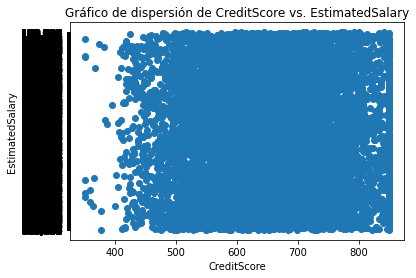

In [18]:
plt.scatter(df_Churn_Modelling_archivo['CreditScore'], df_Churn_Modelling_archivo['EstimatedSalary'])
plt.title('Gráfico de dispersión de CreditScore vs. EstimatedSalary')
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')

#Sigo  el análisis tratando de relacionar Score Vs Salario ( plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')  
#y como esperaba puedo decir a mayor score mayor salario o viceversa. De todas maneras, no veo clara la info.

In [ ]:
df_Churn_Modelling_archivo['Age'].value_counts()
#ahora cuento las edades, veo que hay personas mayores de 80, pero son pocas.

In [ ]:
#Decido filtrar por rangos a partir de los resultados del gráfico de dispersión en este caso entre 20 a 59 que concentra la mayor
#cantidad como se vio en el de dispersión edad vs score
edades_rango = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 20) & (df_Churn_Modelling_archivo['Age'] <= 59)]

conteo_edades_rango = edades_rango['Age'].value_counts().reset_index()
conteo_edades_rango.columns = ['Edad', 'Cantidad']

#Imprimir
print(conteo_edades_rango)



In [ ]:
#Filtro por rango de solo los 30s ya que seguía siendo mucha info
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]
print(Age_df_30)

In [ ]:
#Filtro por rango de solo los 40s
Age_df_40 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 40) & (df_Churn_Modelling_archivo['Age'] <= 49)]

conteo = Age_df_40['Age'].value_counts()

print(conteo)

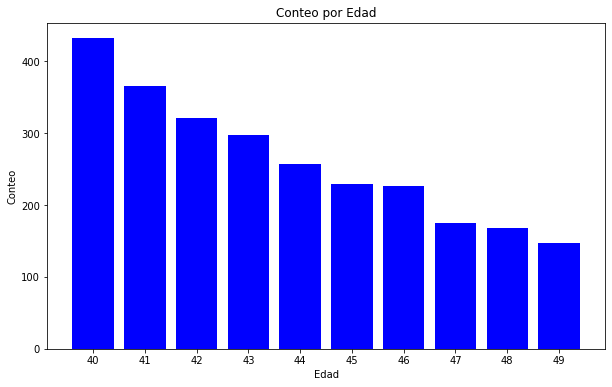

In [23]:
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida
edad = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
conteo = [432, 366, 321, 297, 257, 229, 226, 175, 168, 147]

plt.figure(figsize=(10, 6)) 
plt.bar(edad, conteo, color='blue')  
plt.xlabel('Edad')  
plt.ylabel('Conteo')  
plt.title('Conteo por Edad')  
plt.xticks(edad)  

plt.show()

In [ ]:
# Filtro por los de 30s para contar la cantidad que se repite de cada edad pero siempre con los de 30
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_30['Age'].value_counts()

# Crear el gráfico de torta con Matplotlib
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.title('Distribución de Edades (30-39)')
plt.show()

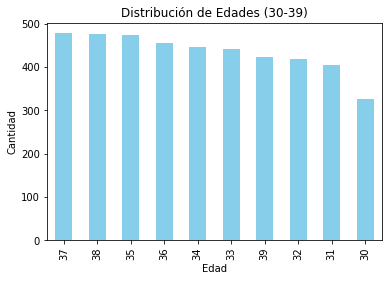

In [25]:
#Mejoro el grafico de torta delos 30 años
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida de los 30 años pero con barras para facilitar luego la comparación

# Filtro por edades de 30 a 39
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_30['Age'].value_counts()

# Crear el gráfico de barras con Matplotlib
age_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Distribución de Edades (30-39)')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

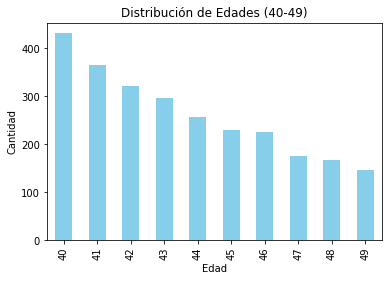

In [44]:
#Mejoro el grafico de torta delos 40 años
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida de los 40 años pero con barras para facilitar luego la comparación

# Filtro por edades de 30 a 39
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 40) & (df_Churn_Modelling_archivo['Age'] <= )]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_40['Age'].value_counts()

# Crear el gráfico de barras con Matplotlib
age_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Distribución de Edades (40-49)')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

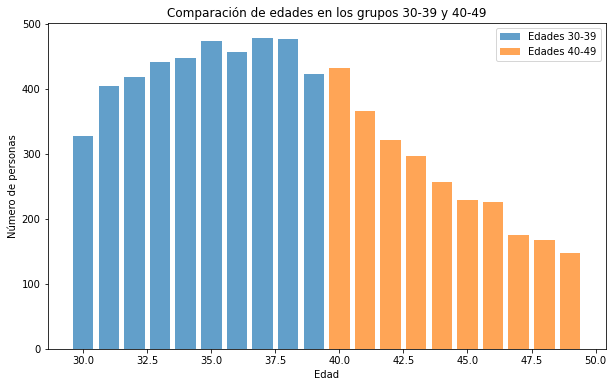

In [24]:
# Filtro por los de 30s y los de 40s  para contar y comparar 

age_counts_30 = Age_df_30['Age'].value_counts().sort_index()
age_counts_40 = Age_df_40['Age'].value_counts().sort_index()

# Crear un gráfico de barras para comparar las edades en ambos grupos
plt.figure(figsize=(10, 6))
plt.bar(age_counts_30.index, age_counts_30.values, label='Edades 30-39', alpha=0.7)
plt.bar(age_counts_40.index, age_counts_40.values, label='Edades 40-49', alpha=0.7)


plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.title('Comparación de edades en los grupos 30-39 y 40-49')
plt.legend()


plt.show()

In [ ]:
#concluyo que a medida que aumenta la edad bajan las cantidad personas

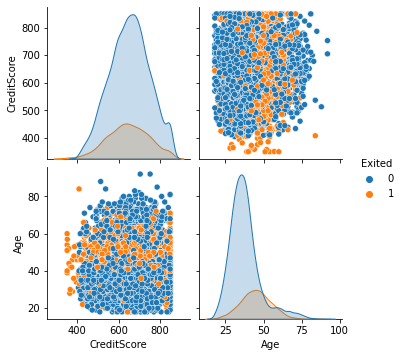

In [25]:
#Uso seaborn para mostrar lo que consiré más importante  buscando relaciones, esto es Credit Score, Edad etc
importantes = df_Churn_Modelling_archivo[['CreditScore','Age','EstimatedSalary','Exited']]

sns.pairplot(importantes , hue = 'Exited')

In [ ]:
#Veo como antes como baja el credit escore a medida que aumenta la edad

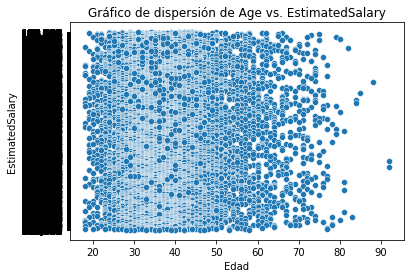

In [48]:
#Sigo comparando la relación Edad vs Salary probando con sns(seaborn)

edad = df_Churn_Modelling_archivo['Age']
salario_estimado = df_Churn_Modelling_archivo['EstimatedSalary']


sns.scatterplot(x=edad, y=salario_estimado)
plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')
plt.xlabel('Edad')
plt.ylabel('EstimatedSalary')

plt.show()

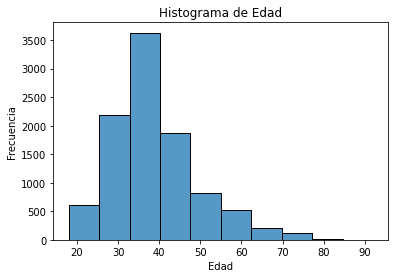

In [49]:
#Me interesa seguir probando sns ahora edad pero con un Histrograma buscando que me traiga la misma concentración de edades
#que en los gráficos anteriores
edad = df_Churn_Modelling_archivo['Age']

sns.histplot(edad, bins=10)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


plt.show()

In [39]:
#Acá vamos a ver ahora que cantidades tenemos de hombres y mujeres
df_Churn_Modelling_archivo.describe(include=['O'])

,Surname,Geography,Gender,Balance
count,10000,10000,10000,10000
unique,2932,3,2,6199
top,Smith,France,Male,0
freq,32,5014,5457,3617


In [ ]:
#Se observa que es mayor la cantidad de hombres, pero no sabemos en que cantidad

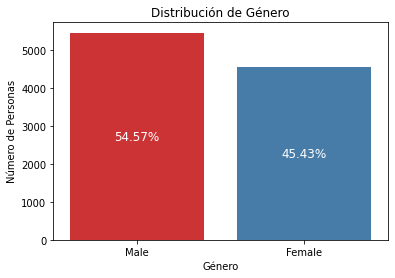

In [50]:

# Muestra el porcentaje de hombres y mujeres
gender_counts = df_Churn_Modelling_archivo['Gender'].value_counts()

# Gráfico de barras
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set1")

# los porcentajes en el centro de cada barra
total_personas = len(df_Churn_Modelling_archivo['Gender'])
for i, value in enumerate(gender_counts.values):
    percentage = (value / total_personas) * 100
    plt.text(i, value/2, f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=12)

# <gráfico
plt.xlabel('Género')
plt.ylabel('Número de Personas')
plt.title('Distribución de Género')

# Grafico
plt.show()



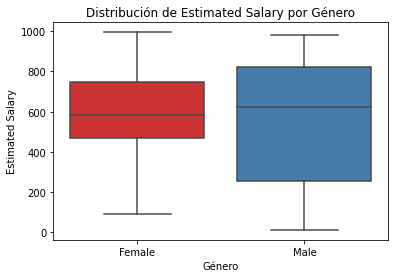

In [58]:
#Quiero saber cómo es la distrinución de los salarios de los hombres vs mujeres

import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'EstimatedSalary' a tipo numérico si no lo es
df_Churn_Modelling_archivo['EstimatedSalary'] = pd.to_numeric(df_Churn_Modelling_archivo['EstimatedSalary'], errors='coerce')

# Gráfico de caja y bigotes
sns.boxplot(x='Gender', y='EstimatedSalary', data=df_Churn_Modelling_archivo, palette='Set1')

# Personalizar el gráfico
plt.xlabel('Género')
plt.ylabel('Estimated Salary')
plt.title('Distribución de Estimated Salary por Género')

# Mostrar el gráfico
plt.show()

#Seguiré analizando porque me interesa saber los EstimatedSalary distribuidos por Gender....

In [ ]:
#Observo que son más altos los salarios de los hombres, se puede deber a las cantidades de la muestra, por lo cual,
#voy a averiguar cantidades

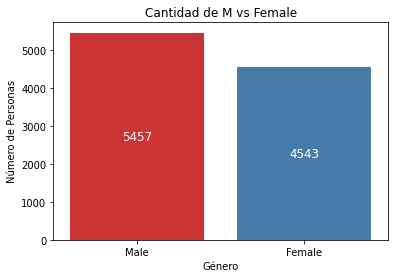

In [66]:
# Cuenta la cantidad de M y Female
gender_counts = df_Churn_Modelling_archivo['Gender'].value_counts()

# Gráfico de barras
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set1")

# Agregar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de Personas')
plt.title('Cantidad de M vs Female')

# Agregar el texto en el centro de las barras
for i, value in enumerate(gender_counts.values):
    ax.text(i, value/2, f'{value}', ha='center', va='center', color='white', fontsize=12)

# Mostrar el gráfico
plt.show()



In [ ]:
# observo una diferencia de más de mil hombres

In [67]:
# Siguiendo la hipótesis Contar la cantidad de IsActiveMember
df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

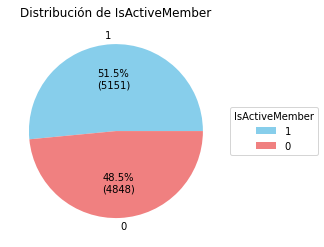

In [68]:
# Grafico las cantidades de miembros activos vs Inactivos

# Contar la cantidad de IsActiveMember
is_active_counts = df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

# Crear un gráfico de torta
plt.pie(is_active_counts, labels=is_active_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(is_active_counts)/100)})', colors=['skyblue', 'lightcoral'])

# Agregar leyenda al costado derecho
plt.legend(labels=is_active_counts.index, title='IsActiveMember', loc='center left', bbox_to_anchor=(1, 0.5))

# Agregar título
plt.title('Distribución de IsActiveMember')

# Mostrar el gráfico
plt.show()



In [ ]:
#Observo que es bastante pareja la situación de los activos vs los inactivos

In [70]:
df_Churn_Modelling_archivo['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

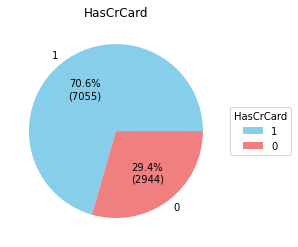

In [71]:
# Cuento la cantidad los que tienen Tarjeta
is_active_counts = df_Churn_Modelling_archivo['HasCrCard'].value_counts()

# Crear un gráfico de torta
plt.pie(is_active_counts, labels=is_active_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(is_active_counts)/100)})', colors=['skyblue', 'lightcoral'])

# Agregar leyenda al costado derecho
plt.legend(labels=is_active_counts.index, title='HasCrCard', loc='center left', bbox_to_anchor=(1, 0.5))

# Agregar título
plt.title('HasCrCard')

# Mostrar el gráfico
plt.show()

In [26]:
#Cuento los Exited es decir los clientes q se fueron. #Cuento clientes que se fueron vs los que siguen , posiblemente por acá pueda  obtener más respuestas a las hipótesis , 
#para saber quiénes abandonan o no el banco

df_Churn_Modelling_archivo['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

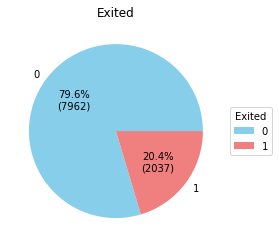

In [27]:
# #Cuento clientes  para saber quiénes abandonan o no el banco
is_active_counts = df_Churn_Modelling_archivo['Exited'].value_counts()

# Gráfico de torta
plt.pie(is_active_counts, labels=is_active_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(is_active_counts)/100)})', colors=['skyblue', 'lightcoral'])

# Agrego leyenda al costado derecho
plt.legend(labels=is_active_counts.index, title='Exited', loc='center left', bbox_to_anchor=(1, 0.5))

# Agrego título
plt.title('Exited')

# Grafico
plt.show()

In [86]:
#Análisis de correlaciones
df_Churn_Modelling_archivo.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


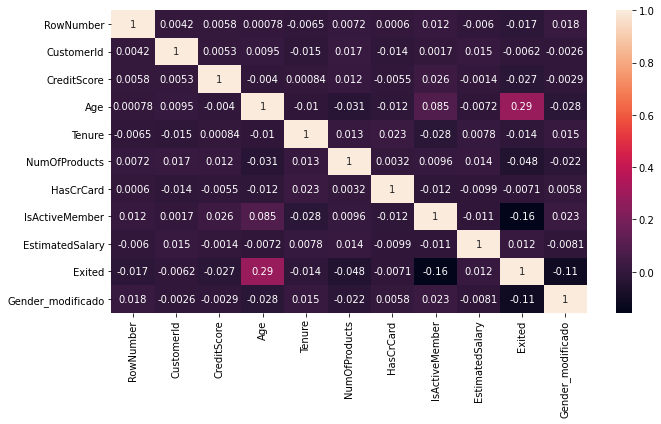

In [21]:
#Buscando correlación entre variables

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_Churn_Modelling_archivo.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

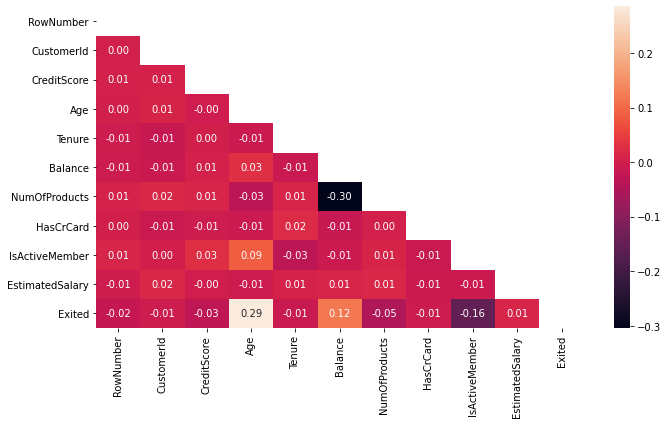

In [87]:
#se limpia el gráfico----veo que la edad no tiene correlación sino está relacionado con la cantidad de productos que tenga en el banco
fig, ax = plt.subplots(figsize=(10,6))

mask = np.triu(np.ones_like(df_Churn_Modelling_archivo.corr(),dtype = bool))
sns.heatmap(df_Churn_Modelling_archivo.corr(), mask = mask, fmt = ".2f",
            annot=True, 
            ax=ax)

plt.tight_layout()

In [20]:
#Se observa que la relación más alta se da entre Age y Excited con 0,29--Por lo cual se intenterá predecir el churn con un modelo
#basado en lo anterior




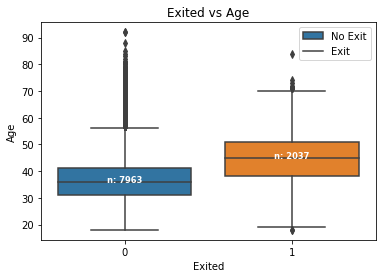

In [19]:
#Quiero graficar como quedaría la relación Age-Exited

# Crear el boxplot
sns.boxplot(x='Exited', y='Age', data=df_Churn_Modelling_archivo)

# Agregar leyenda
plt.legend(labels=['No Exit', 'Exit'])

# Obtener las cantidades en el centro de cada gráfico
medians = df_Churn_Modelling_archivo.groupby(['Exited'])['Age'].median().values
nobs = df_Churn_Modelling_archivo['Exited'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Agregar las cantidades en el centro
pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='small', color='w', weight='semibold')

# Añadir título al gráfico
plt.title("Exited vs Age")

# Mostrar el gráfico
plt.show()


In [ ]:
#Así se ve graficada esa relación. Habíamos visto que a medida que aumenta la edad aumenta el churn


In [18]:
df_Churn_Modelling_archivo['Balance'].dtype

dtype('O')

In [74]:
#Hago un modelo para predecir el EstimatedSalary y el CreditScore. EstimatedSalary variable dependiente (Y) y CreditScore independiente(X)
#se puede ver que el Pv es mayor a 0,05 por lo cual vamos a descartar la variable CreditScore.
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = 'Exited ~ Age'

# La función ols() se utiliza para especificar el modelo de regresión lineal.
lm = smf.ols(formula=model, data=df_Churn_Modelling_archivo).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     886.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          1.24e-186
Time:                        16:13:56   Log-Likelihood:                -4670.4
No. Observations:               10000   AIC:                             9345.
Df Residuals:                    9998   BIC:                             9359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2228      0.015    -15.014      0.0

In [44]:
#Ahora pienso que es probable que la edad pueda que no sea un factor determinante. Para ello me interesa saber la actividad de los clientes:
#Cuento clientes activos vs inactivos, posiblemente por acá pueda obtener alguna respuesta, para saber quiénes abandonan o no el banco
df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [36]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [37]:
import statsmodels.formula.api as smf

# Modelo con Exited como variable dependiente y Age y IsActiveMember como variables independientes
model2 = 'Exited ~ Age + IsActiveMember'

# Utilizamos la función ols() para especificar el modelo de regresión lineal
lm2 = smf.ols(formula=model2, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     644.6
Date:                Tue, 06 Feb 2024   Prob (F-statistic):          4.70e-264
Time:                        20:43:17   Log-Likelihood:                -4488.4
No. Observations:               10000   AIC:                             8983.
Df Residuals:                    9997   BIC:                             9005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1705      0.015    -11.

In [ ]:
#Modelo con Exited como variable dependiente y Age y IsActiveMember como variables independientes
model3 = 'Age ~  Exited  + IsActiveMember + EstimatedSalary '

# Utilizamos la función ols() para especificar el modelo de regresión lineal
lm3 = smf.ols(formula=model3, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(lm3.summary())


In [ ]:
#Quiero verificar si agregando el Salario Estimado mejora el modelo. 
#Pero como resultado no se ve que mejore la robustez del modelo si lo comparo con el modelo 1 teniendo en cuenta el R-squared

In [ ]:
# Modelo con Exited como variable dependiente y Age e IsActiveMember como variables independientes
model4 = 'Exited ~ Age + IsActiveMember + EstimatedSalary + Tenure +  HasCrCard'

# Utilizamos la función ols() para especificar el modelo de regresión lineal
lm4 = smf.ols(formula=model4, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(lm4.summary())


In [ ]:
# Modelo con Exited como variable dependiente  Age + IsActiveMember + Balance como variables independientes
model5 = 'Exited ~ Age + IsActiveMember + Balance'

# Utiliza la función ols() para especificar el modelo de regresión lineal
lm5 = smf.ols(formula=model5, data=df_Churn_Modelling_archivo).fit()

# Imprime el resumen del modelo
print(lm5.summary())


In [ ]:
#los valores predichos del modelo
predicted_values = lm2.predict()

# Gráfico de dispersión de valores reales vs valores predichos
plt.scatter(df_Churn_Modelling_archivo['Exited'], predicted_values)
plt.xlabel('Exited (Valores reales)')
plt.ylabel('Exited (Valores predichos)')
plt.title('Gráfico de dispersión de valores reales vs predichos')
plt.show()

# Gráfico de residuos
residuals = lm2.resid
plt.scatter(predicted_values, residuals)
plt.xlabel('Exited (Valores predichos)')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1.5)
plt.title('Gráfico de residuos')
plt.show()


In [ ]:
#Cada punto representa una observación del conjunto de datos.
#Si el modelo es bueno, los puntos deberían estar cerca de la línea diagonal. Un patrón fuertemente no lineal o dispersión desigual puede indicar problemas en la modelización.

#Gráfico de residuos:
# residuos son las diferencias entre los valores reales y los predichos.
#Un patrón sistemático en el gráfico de residuos puede indicar que el modelo no está capturando completamente la estructura de los datos.
#La línea horizontal en rojo en el gráfico de residuos es la línea cero, y los residuos deberían distribuirse alrededor de esta línea si el modelo es adecuado.
#Estos gráficos te ayudarán a evaluar visualmente el rendimiento de tu modelo de regresión lineal múltiple.

In [ ]:

#Con este último modelo quise ver si le agregaba variables y lo hacía más complejo iba a mejorar la capacidad de predecir. 
#Por ejemplo teniendo en cuenta que a mayor salario, mayor tenencias de productos por lo cual podía haber menos probablidades de que deje el banco, pero no tuve esos resultados.  
#Si se tiene en cuenta el F-statistic es más alto en el Modelo II, indicando un mejor ajuste general del modelo, y es más simple al incluir menos variables.


In [ ]:
#RESUMEN DE LO REALIZADO
#Sabiendo que creo que estaba adelantado con esta entrega, por lo que fui entregando antes, ahora fui agregando variables para mejorar los modelos y dejé las conclusiones. Si detecto que BALANCE estaba como O y lo paso a números.  #
#A partir de esto creo que se me abre otro panorame para seguir profundizando con esta variable. Además agregué un gráfico del Modelo II para ratar de
#entender si el modelo va a ser capaz de predecir. Falta profundizar que espero seguir adquiendo conocomiento para poder hacerlo. 

In [28]:
df_Churn_Modelling_archivo['Balance'].dtype

dtype('O')

In [ ]:
#sigo acá probando

In [ ]:
df_Churn_Modelling_archivo.corr()

In [32]:
# Convertir la columna 'balance' a numérico
df_Churn_Modelling_archivo['Balance'] = pd.to_numeric(df_Churn_Modelling_archivo['Balance'], errors='coerce')

In [34]:
df_Churn_Modelling_archivo.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_modificado,Geography_modificado
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,NaN,0.007246,0.000599,0.012044,-0.016571,0.018196,0.006028
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,NaN,0.016972,-0.014025,0.001665,-0.006248,-0.002641,-0.006670
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,NaN,0.012238,-0.005458,0.025651,-0.027094,-0.002857,0.000478
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,NaN,-0.030680,-0.011721,0.085472,0.285323,-0.027544,0.029824
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,NaN,0.013444,0.022583,-0.028362,-0.014001,0.014733,-0.002713
Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,NaN,1.000000,0.003183,0.009612,-0.047820,-0.021859,-0.011923
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,NaN,0.003183,1.000000,-0.011866,-0.007138,0.005766,0.014734
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,NaN,0.009612,-0.011866,1.000000,-0.156128,0.022544,-0.022807
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,NaN,-0.047820,-0.007138,-0.156128,1.000000,-0.106512,0.138714


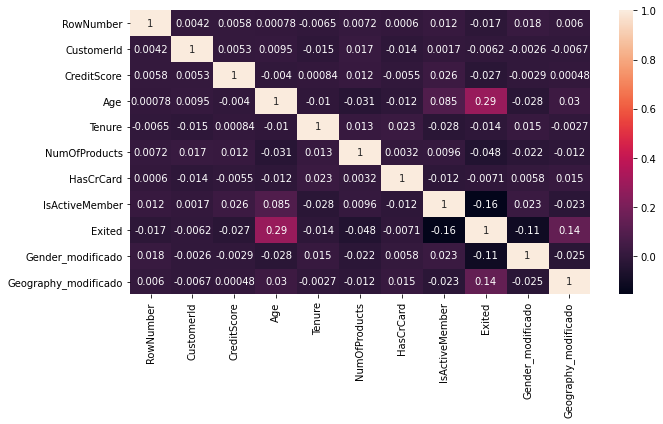

In [30]:
#Buscando correlación entre variables

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_Churn_Modelling_archivo.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

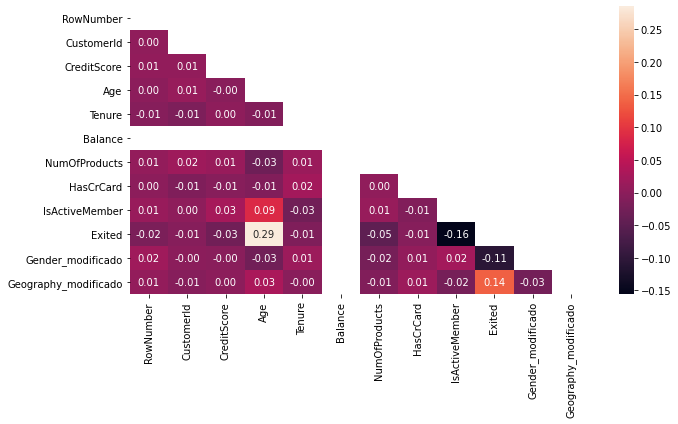

In [35]:
#se limpia el gráfico----veo que la edad no tiene correlación sino está relacionado con la cantidad de productos que tenga en el banco
fig, ax = plt.subplots(figsize=(10,6))

mask = np.triu(np.ones_like(df_Churn_Modelling_archivo.corr(),dtype = bool))
sns.heatmap(df_Churn_Modelling_archivo.corr(), mask = mask, fmt = ".2f",
            annot=True, 
            ax=ax)

plt.tight_layout()

In [31]:
df_Churn_Modelling_archivo['Balance'].dtype

dtype('O')

In [41]:
# Define el modelo de regresión lineal
model5 = 'Exited ~ Age + IsActiveMember + Balance'

# Utiliza la función ols() para especificar el modelo de regresión lineal
lm5 = smf.ols(formula=model5, data=df_Churn_Modelling_archivo).fit()

# Imprime el resumen del modelo
print(lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     171.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           5.44e-72
Time:                        01:32:42   Log-Likelihood:                -1120.4
No. Observations:                3617   AIC:                             2247.
Df Residuals:                    3614   BIC:                             2265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1436      0.021     -6.

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
#R-squared: Indica que aproximadamente el 12.6% de la variabilidad en la variable dependiente (Exited) es explicada por estas tres variables.
#P-values: Todas las variables tienen p-values significativamente bajos, lo que sugiere que todas son estadísticamente significativas.

#Si lo comparo con el que hasta ahora era el mejor que fue el Modelo II, este tiene un R-squared más alto, lo que indica que explica una mayor proporción de la variabilidad en la variable dependiente.
#Sin embargo, la inclusión de más variables no siempre es mejor. Es posible que se esté incurriendo en un sobreajuste (overfitting) al incluir variables adicionales que no mejoran significativamente la capacidad predictiva del modelo.
#Pero hay que seguir analizando y teniendo en cuenta el contexto. 



#fin

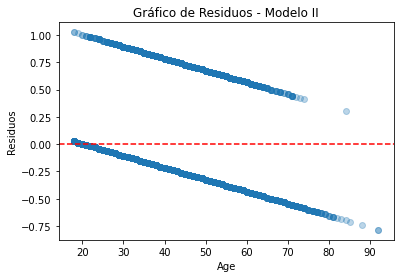

In [24]:
#grafico modelo II

import statsmodels.api as sm
import matplotlib.pyplot as plt

model = sm.OLS(df_Churn_Modelling_archivo['Exited'], sm.add_constant(df_Churn_Modelling_archivo['Age'])).fit()
residuals = model.resid

plt.scatter(df_Churn_Modelling_archivo['Age'], residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Residuos - Modelo II")
plt.xlabel("Age")
plt.ylabel("Residuos")
plt.show()


In [21]:
#Un gráfico de residuos ayuda para evaluar la homocedasticidad y la normalidad de los residuos.

In [28]:


# Verificar las columnas y tipos de datos
print(df_Churn_Modelling_archivo[['Age', 'IsActiveMember', 'Balance', 'Exited']].info())

# Verificar valores nulos
print(df_Churn_Modelling_archivo[['Age', 'IsActiveMember', 'Balance', 'Exited']].isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             10000 non-null  int64 
 1   IsActiveMember  10000 non-null  int64 
 2   Balance         10000 non-null  object
 3   Exited          10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None
Age               0
IsActiveMember    0
Balance           0
Exited            0
dtype: int64


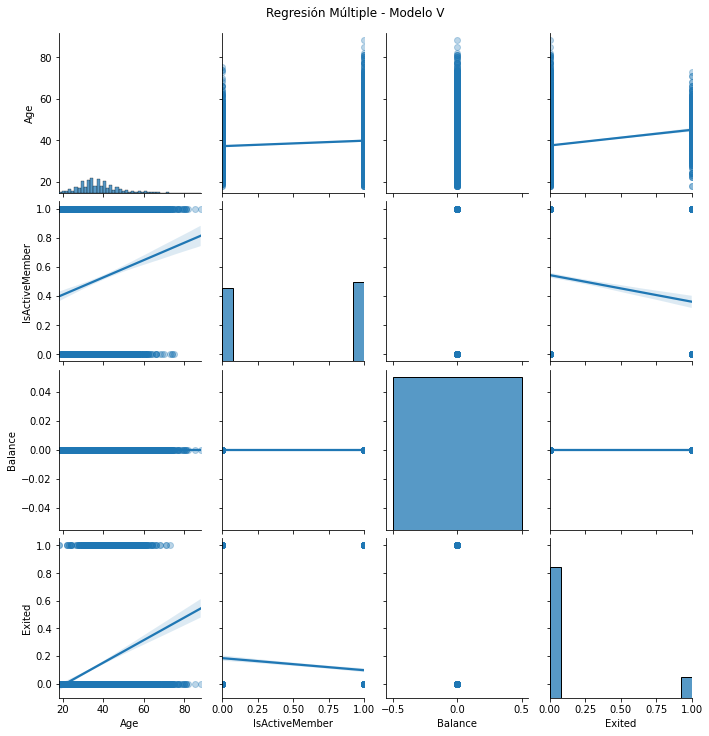

In [42]:
#gráfico modelo V

# Crear el gráfico de regresión múltiple
pair_plot = sns.pairplot(df_Churn_Modelling_archivo[['Age', 'IsActiveMember', 'Balance', 'Exited']].dropna(), kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})

plt.suptitle("Regresión Múltiple - Modelo V", y=1.02)
plt.show()

